# Ford GoBike Data Visualization - Factors affecting Trip Duration
## by Chaitanya Bachhav 

## Investigation Overview

> In this investigation relationships between various factors of the bike share system and trip duration were inspected. The main focus was on trip start month, trip start day of the week and user type factors.

## Dataset Overview

> The data set consists bike share data for 519700 bike rides. Each bike ride (row) has 13 features (columns) which include user-type, trip start station, end station, start time, end time and bike_id. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
bike_data = pd.read_csv('2017-fordgobike-tripdata.csv')


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of Trip Duration 

> The unit of duration in this data set is seconds. Duration takes on very large values starting from 61 to 86369. The right-skewed and long tailed linearly scaled distribution warranted the use of a logarithmic scale. The distribution takes on a unimodal shape.

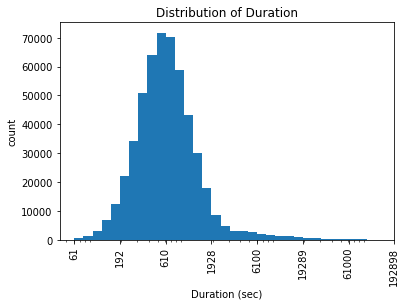

In [3]:
# change data type of start_time and end_time to datetime datatype
bike_data.start_time = pd.to_datetime(bike_data.start_time)
bike_data.end_time = pd.to_datetime(bike_data.end_time)
# change the user type to categorical data
bike_data.user_type = bike_data.user_type.astype('category')
bins = 10 ** np.arange(np.log10(bike_data.duration_sec.min()),np.log10(bike_data.duration_sec.max()) + 0.1, 0.1)
ticks = 10 ** np.arange(np.log10(bike_data.duration_sec.min()),np.log10(bike_data.duration_sec.max()) + 0.5, 0.5)
labels = list()
for tick in ticks:
    labels.append('{:d}'.format(int(tick)))
plt.hist(bike_data.duration_sec, bins = bins);
plt.xscale('log')
plt.xticks(ticks, labels, rotation = 90)
plt.xlabel('Duration (sec)')
plt.ylabel('count')
plt.title('Distribution of Duration');

## Month wise Distribution of Trips

> The following plot depicts the number of trips made during each month from June to December in the year 2017. It can be observed that most number of trips were made during the month of october. Least number of trips are in June 2017.

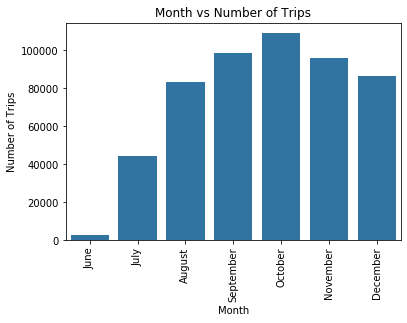

In [8]:
bike_data['year_month_start_time'] = bike_data.start_time.dt.month.astype('int')
base_color = sb.color_palette()[0]
sb.countplot(bike_data.year_month_start_time, color = base_color )
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.title('Month vs Number of Trips')
plt.xticks(ticks = [0, 1, 2, 3, 4, 5, 6], labels = ['June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation = 90)
plt.show();

## Number of trips made during each Day of the Week
> The following plot depicts the days of week on the X-Axis and number of trips on Y-axis. It can observed that most trips were made during week days i.e. working days and lesser trips were made during week ends. This suggests that more trips were made by users for travelling to their workplaces.  



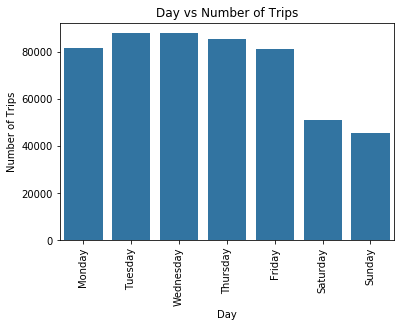

In [10]:
bike_data['week_day_start'] = bike_data.start_time.dt.day_name()
base_color = sb.color_palette()[0]
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sb.countplot(bike_data.week_day_start, color = base_color,  order = order)
plt.xlabel('Day')
plt.xticks(rotation = 90)
plt.ylabel('Number of Trips')
plt.title('Day vs Number of Trips');

## Number of trips made by each User Type
> The data-set consists of two types of users
 - Casual Customer
 - Subscriber <br>
The folowing plot depicts the number of trips made by each user type.It can be observed that the regural subscribers make more number of trips than casual customers

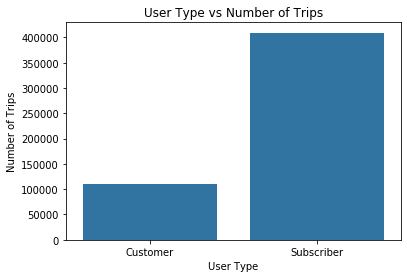

In [11]:
sb.countplot(bike_data.user_type, color = sb.color_palette()[0]);
plt.xlabel("User Type")
plt.ylabel("Number of Trips")
plt.title('User Type vs Number of Trips');

## Mean Trip Duration of each User Type
> The following plot depicts the mean duration of trip (seconds) of each user type. Previously it was observed that more trips are made by regular subscribers, but this plot shows that the casual customers go on longer trips in comparison to regular subscribers.

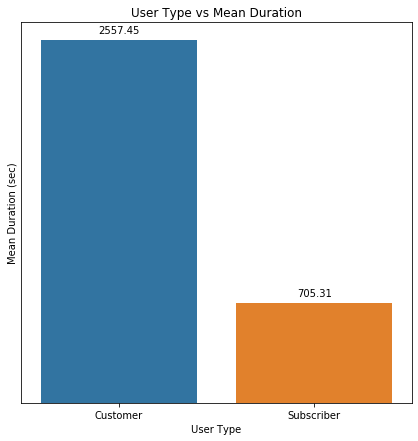

In [30]:
plt.figure(figsize = (7,7))
g = sb.barplot(data = bike_data, x = 'user_type', y = 'duration_sec', ci = None)
for p in g.patches:
    g.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.xlabel("User Type")
plt.yticks(ticks = [] , label = '')
plt.ylabel('Mean Duration (sec)')
plt.title('User Type vs Mean Duration');


##  Month vs Trip Duration
> The following box plot depicts the duration in seconds on Y-Axis and the month on the X-axis. It can be observed that users go on longer bike rides in the month of July in comparison to other, this may because the climate is suitable for riding in summer season. 

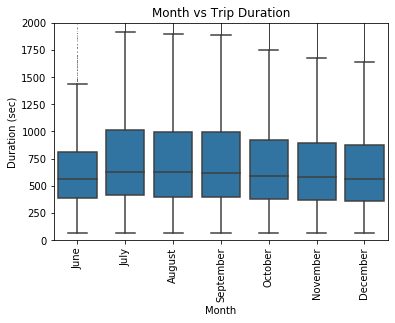

In [51]:
bike_data['year_month_start_time'] = bike_data.start_time.dt.month.astype('int')
base_color = sb.color_palette()[0]
sb.boxplot(bike_data.year_month_start_time, bike_data.duration_sec, color = base_color, fliersize = 1/10)
plt.ylim((0, 2000))
plt.xlabel('Month')
plt.ylabel('Duration (sec)')
plt.title('Month vs Trip Duration')
plt.xticks(ticks = [0, 1, 2, 3, 4, 5, 6], labels = ['June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation = 90)
plt.show();

## Day vs Trip Duration
> The following plot has days of week on X-axis and trip duration on the Y-axis. It can be inferred that users go on longer bike rides on week ends, the number of trips on week ends is less but the mean trip duration is highest on Sundays.

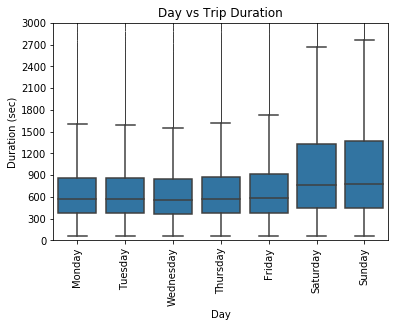

In [50]:
sb.boxplot(bike_data.week_day_start,bike_data.duration_sec, color = sb.color_palette()[0], order = order, fliersize = 1/10)
plt.ylabel('Duration (sec)')
plt.xlabel('Day')
plt.ylim((0,2800))
plt.yticks(np.arange(0,3100, 300))
plt.xticks(rotation = 90)
plt.title('Day vs Trip Duration');

## Month vs Day Trip Distribution
> The following heatmap depicts the number of trips made on a particular day during a particular month.It can be observed that in every month most of the bike rides occur during working days (week days) and the number of bike rides is lesser during weekends.

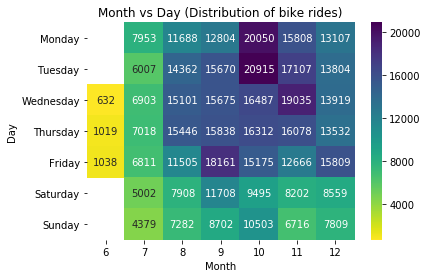

In [39]:
counts_ct = pd.DataFrame(bike_data.groupby(['year_month_start_time', 'week_day_start']).size())
counts_ct = counts_ct.rename(columns = {0 : 'count'} )
counts_ct = counts_ct.reset_index()
counts_ct = counts_ct.pivot(index = 'week_day_start', columns = 'year_month_start_time', values = 'count').reindex(order)
g = sb.heatmap(counts_ct, cmap = 'viridis_r', annot = True, fmt = '0.0f');
b, t = plt.ylim() 
b += 0.5 
t -= 0.5  
plt.ylim(b, t) 
plt.xlabel('Month')
plt.ylabel('Day')
plt.title('Month vs Day (Distribution of bike rides)');

plt.show() 

## Duration by Day and User Type
> In the following plot the trip duration changes based on user type and day are depicted. Orange boxplot depicts regular subscriber and blue boxplot depicts casual customer. It is evident that even though regular subscribers go on more number of rides the mean duration of rides is greater for casual customers, also users go on longer rides on week-ends.

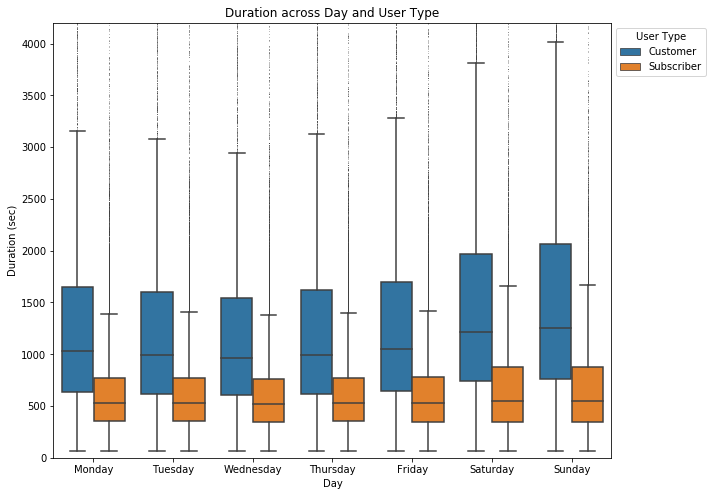

In [45]:
plt.figure(figsize = (10,8))
sb.boxplot(x = bike_data.week_day_start, y = bike_data.duration_sec, hue = bike_data.user_type, order = order, fliersize = 1/10);
plt.ylim((0,4200))
plt.ylabel('Duration (sec)')
plt.xlabel('Day')
plt.title('Duration across Day and User Type')
plt.legend(title = 'User Type', bbox_to_anchor = (1,1));

## Duration by Month and User Type
> In the following plot the trip duration changes based on user type and month are depicted. Orange boxplot depicts regular subscriber and blue boxplot depicts casual customer. The month wise trip duration depicted that the mean trip duration was highest in July 2017 and declined after that for both type of customers.

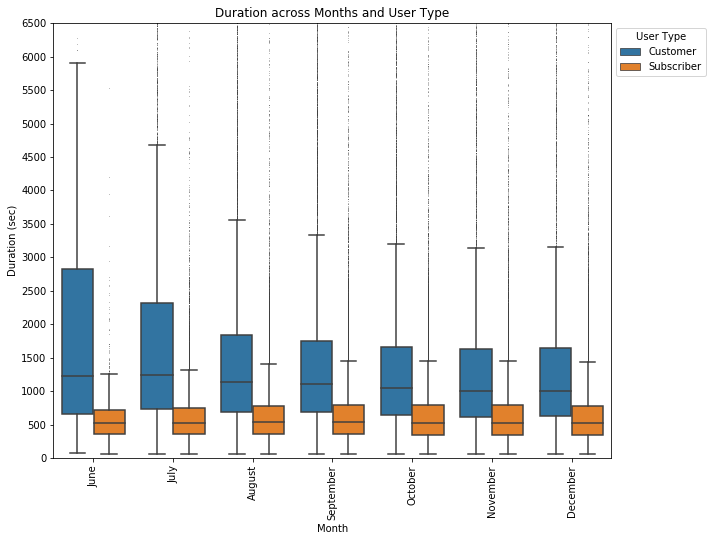

In [49]:
plt.figure(figsize = (10,8))

sb.boxplot(x = bike_data.year_month_start_time, y = bike_data.duration_sec, hue = bike_data.user_type, fliersize = 1/10);
plt.ylim((0,6000))
plt.xticks(ticks = [0, 1, 2, 3, 4, 5, 6], labels = ['June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation = 90)

plt.legend(bbox_to_anchor = (1,1), title = 'User Type')
plt.yticks(np.arange(0,7000, 500))
plt.ylabel('Duration (sec)')
plt.xlabel('Month')
plt.title('Duration across Months and User Type');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!